# Challenge 3

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(include="int64")

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [5]:
#your code here- categorical variable
titanic.select_dtypes(include="object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

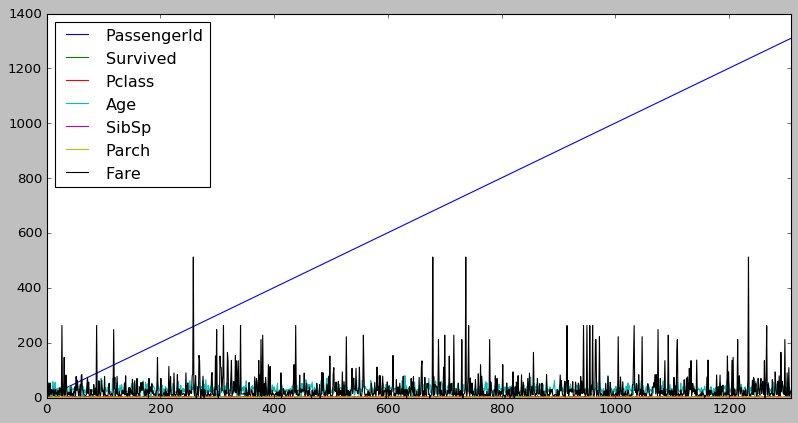

In [6]:
# your code here
plt.style.use('classic')
titanic.plot(figsize=(12,6))

#### Use the appropriate visulalization to show the distribution of the column `Age`

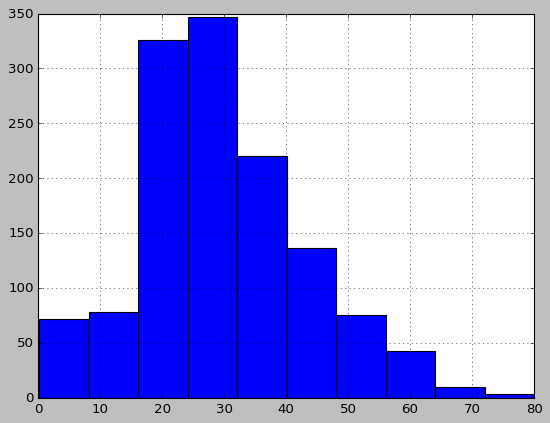

In [7]:
# your code here
titanic['Age'].hist()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

(array([ 51.,  21.,  25.,  53., 123., 203., 178., 169., 150.,  70.,  68.,
         68.,  47.,  28.,  21.,  21.,   5.,   5.,   2.,   1.]),
 array([ 0.17  ,  4.1615,  8.153 , 12.1445, 16.136 , 20.1275, 24.119 ,
        28.1105, 32.102 , 36.0935, 40.085 , 44.0765, 48.068 , 52.0595,
        56.051 , 60.0425, 64.034 , 68.0255, 72.017 , 76.0085, 80.    ]),
 <a list of 20 Patch objects>)

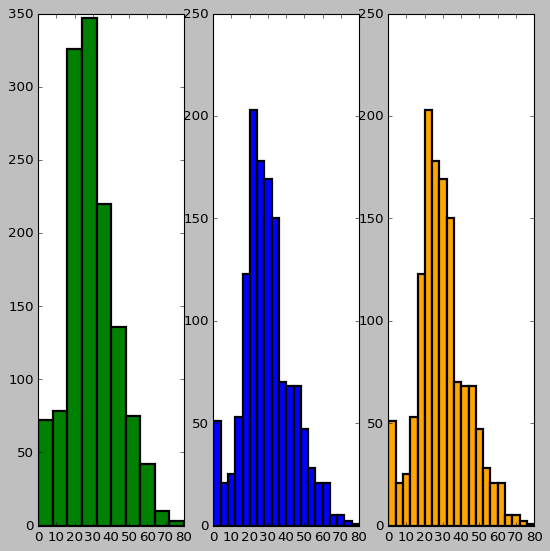

In [8]:
# your code here
fig,axes=plt.subplots(1,3,figsize=(8,8))
axes[0].hist(titanic["Age"],bins = 10,linewidth=2, color = "green", ls = "-")
axes[1].hist(titanic["Age"],bins = 20,linewidth=2, color = "blue", ls = "-")
axes[2].hist(titanic["Age"],bins = 20,linewidth=2, color = "orange", ls = "-")


#### Whether the bin size affects your plot? Why?

In [11]:
#your comment here
#Divide los valores en una serie de intervalos en el primero de 10 etc.. y pone los valores que han caido en
#ese rango

#### Use seaborn to show the distribution of the column `Age`

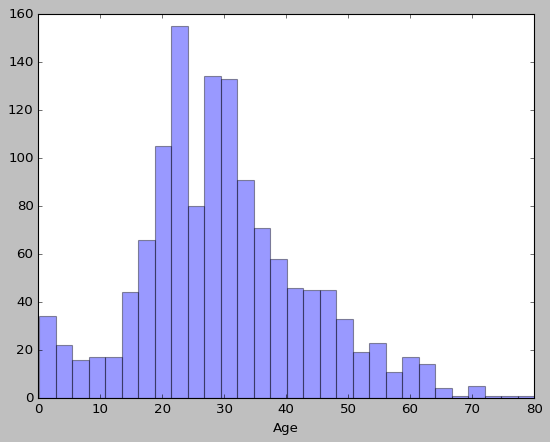

In [15]:
# your code here
sns.distplot(titanic["Age"], kde=False);

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

(array([843.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 466.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

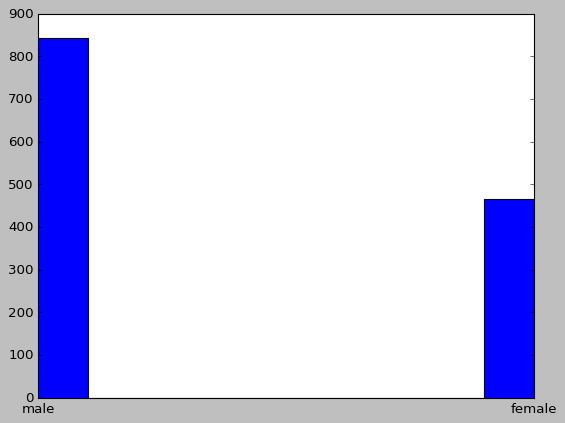

In [16]:
# your code here- 1st way
# los hombres y las mujeres estan enfadados por lo que se ve. Cosas de la vida. 
#No queria hacerlo creando otro dataframe

plt.hist(titanic["Gender"])

In [17]:
# your code here- 2nd way
sns.barplot([titanic["Gender"])
# me rindo con este que es muy tonto pero no me sale. Agradeceria la solucion.

SyntaxError: invalid syntax (<ipython-input-17-5aa9f8f59971>, line 2)

#### Use the appropriate plot to visualize the column `Pclass` 


In [18]:
# your code here
titanic["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

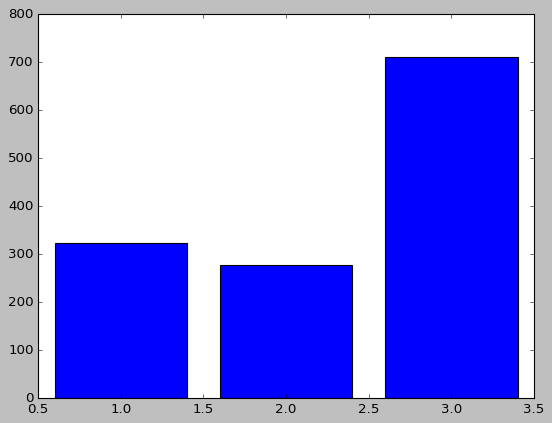

In [20]:
def count_class():
    count=[0,0,0]
    for e in titanic["Pclass"]:
        if e==1:
            count[0]+=1
        elif e==2:
            count[1]+=1
        else:
            count[2]+=1
        
    return count
    
plt.bar([1,2,3],count_class())   

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

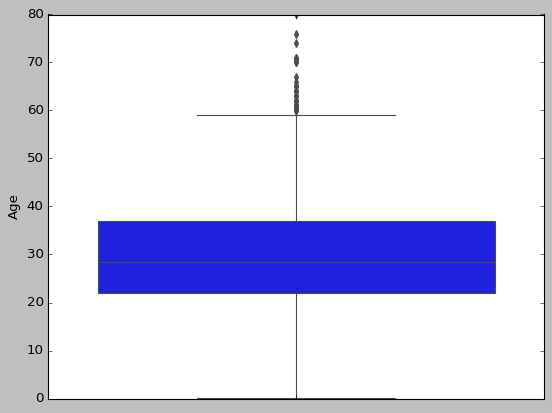

In [35]:
# your code here
titanic["Age"].describe()

sns.boxplot(y =titanic["Age"])


#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
'''Que todas las edades estan aproximadamente entre 20 y 40'''

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

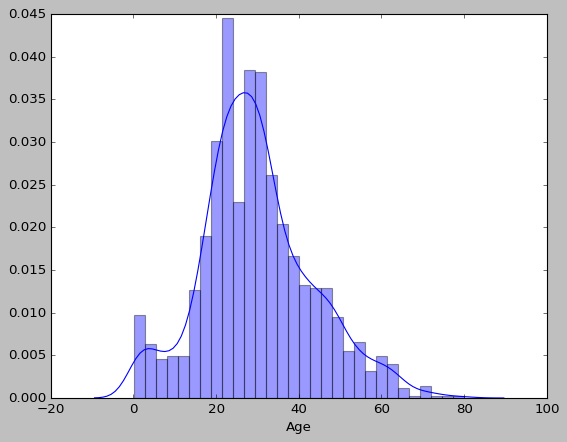

In [37]:
#your code here

sns.distplot(titanic["Age"]);

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

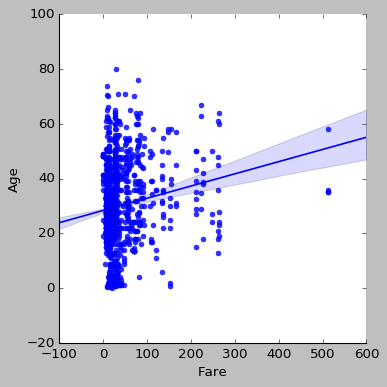

In [38]:
#your code-1st way
sns.lmplot(x="Fare", y="Age", data=titanic)

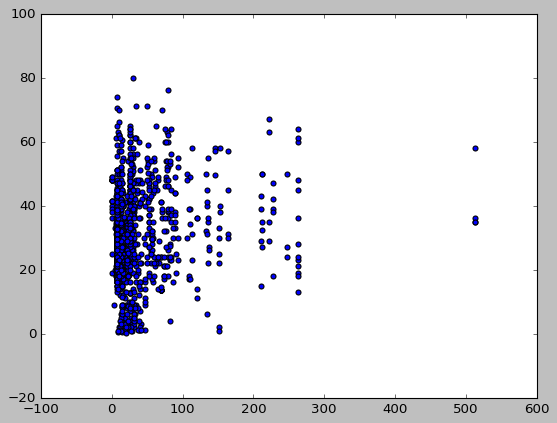

In [40]:
# your code-2nd way
plt.scatter(titanic.Fare, titanic.Age)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

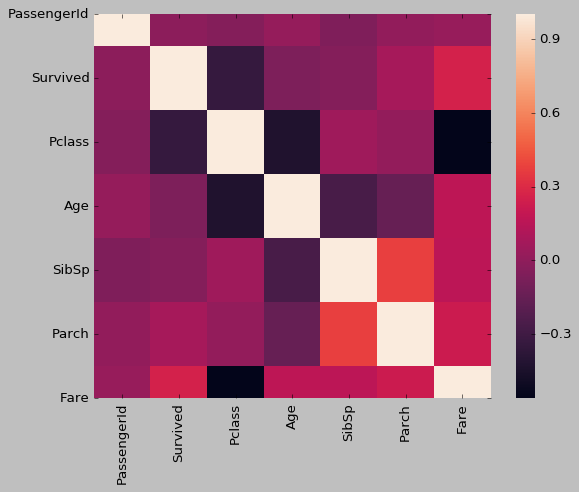

In [46]:
#your code here
x =titanic.corr()

sns.heatmap(x)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
'''Parch y SibSps son las mas relacionadas'''

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [47]:
#your code here
y =titanic["Age"].describe()
plt.boxplot()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [10]:
#your code here


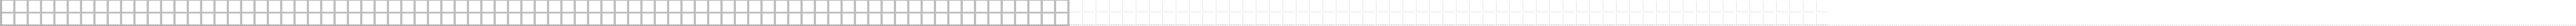

In [49]:
sns.FacetGrid(titanic, col="Age", row="Gender")